In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Reduce_the_data_trend_weathersit_counts').getOrCreate()

df = spark.read.csv('../Bike-Sharing-Dataset-hour_new.csv',header=True,inferSchema=True)

In [5]:
import pandas as pd
from pyspark.sql.functions import *

group_df = df.select('weathersit','casual','registered','cnt')
group_df = group_df.groupBy('weathersit').mean()
group_df = group_df.select('weathersit',
                            format_number('avg(casual)',2),
                            format_number('avg(registered)',2),
                            format_number('avg(cnt)',2))
group_df = group_df.select(col('weathersit').alias('Weathersit'),
                           col('format_number(avg(casual), 2)').alias('Average Casual'),
                           col('format_number(avg(registered), 2)').alias('Average Registered'),
                           col('format_number(avg(cnt), 2)').alias('Average CNT')).orderBy('avg(cnt)')
pd.DataFrame(group_df.take(group_df.count()), columns=group_df.columns).transpose()

,0,1,2,3
Weathersit,4,3,2,1
Average Casual,2.67,16.06,29.78,40.55
Average Registered,71.67,95.52,145.83,164.32
Average CNT,74.33,111.58,175.62,204.87


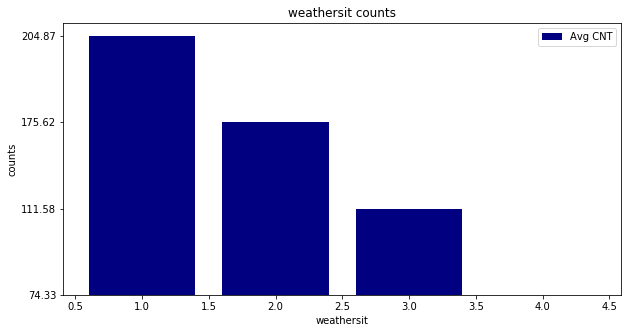

In [6]:
import matplotlib.pyplot as plt
import numpy as np

group_df = group_df.toPandas()

plt.bar(group_df['Weathersit'], group_df['Average CNT'], color='navy')
#set y ticks based on above average cnt results
plt.yticks(np.arange(4), ('74.33', '111.58', '175.62', '204.87'))
plt.legend(['Avg CNT'])
plt.xlabel('weathersit')
plt.ylabel('counts')
plt.title('weathersit counts')
plt.show()

In [4]:
plt.rcParams['figure.figsize'] = (10,5)